## Topic: Linear Regression for real world dataframe

### OUTCOMES

- 1. load dataset

- 2. Train a Linear Regression Model

- 3. View the learned Parameters

- 4. Predict (Validation for existing created data)

- 5. Visualize the Actual data vs Best Fit line

- 6. Prediction for a New data

In [1]:
# import libaries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

### 1. load dataset

In [2]:
df = pd.read_csv("placement.csv")

df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


In [3]:
df.isna().sum()

cgpa       0
package    0
dtype: int64

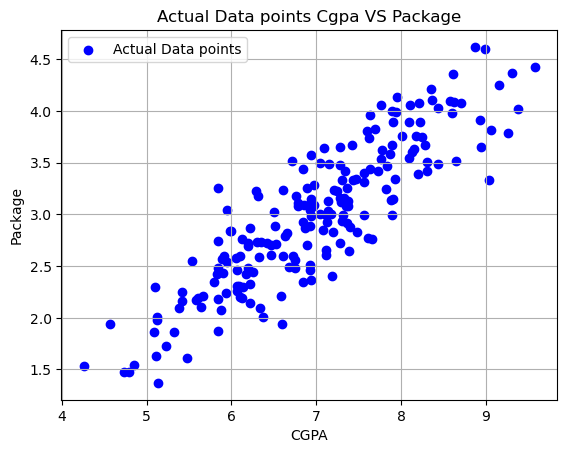

In [21]:
# plot or Visualzation of dataset 

plt.scatter(df["cgpa"], df['package'], color = 'blue', label = 'Actual Data points')

plt.title(f"Actual Data points Cgpa VS Package")
plt.xlabel("CGPA")
plt.ylabel("Package")

plt.legend()
plt.grid(True)
plt.show()

- for above data points are sorted to liner 
- Decision for plot:
    - we can use Linear Regression Model for those data points
    - Becuase Data points are sorted.

### 2. Train a Linear Regression Model

In [4]:
# import linear Regression model

from sklearn.linear_model import LinearRegression

In [5]:
# split the data into (X feature and y feature ) or label for input features and target features


# X feature or input label
X = df.iloc[:,0:1] # row = all and column = 0 to before 1 or (0)

# X = df[['cgpa']]

# y feature or target label

y = df.iloc[:,-1]  # row = all and last column 

# y = df['package']

print("X Total data : ", len(X))
print("y Total Data : ", len(y))



X Total data :  200
y Total Data :  200


In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state = 2)


In [101]:
print("The Actual Total Data points: ", len(df))

The Actual Total Data points:  200


In [102]:
print("Total X_train data: ", len(X_train))
print("Total X_test data: ", len(X_test))

Total X_train data:  150
Total X_test data:  50


In [103]:
print("Total y_train data: ", len(y_train))
print("Total y_test data: ", len(y_test))

Total y_train data:  150
Total y_test data:  50


- We are only train
    - X_train and y_train data points 

- Based on this train we test 
    - X_test and y_test data points

    - for each X_test value is Near to the y_test value [- that's our prediction result]

In [7]:
# Now train the model

model = LinearRegression()

model.fit(X_train, y_train)


LinearRegression()

- In this model(LinearRegression) Learn two Parameter
    - 1. slope(m)
    - 2. intercept(c)

### 3. View the learned Parameters

In [9]:
# First Learn parameter -> m (slope)

m = model.coef_[0]

c = model.intercept_

print("Slope (m) : ", m)
print("Intercept (c): ",c)

Slope (m) :  0.5665158997062707
Intercept (c):  -0.9545467420146729


- so, the best fit line:
    - y = m * x + c
    - y = 0.56 * x + (-0.95)

### 4. Predict (Validation for Test datapionts)

In [10]:
# predict for the test datapoints

predict_package = X_test.iloc[1].values.reshape(1,1)

prediction_test_package = model.predict(predict_package)

print(f"Model Predicted Package: {prediction_test_package}")


Model Predicted Package: [3.09604194]


c:\Users\KzRaihan\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [12]:
print("The Actual Package : ", y_test.iloc[1])

The Actual Package :  3.49


In [13]:
# the another way to 
model.predict(X_test.iloc[0].values.reshape(1,1))

# 0-base indexing follow

c:\Users\KzRaihan\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([3.90615968])

In [15]:
y_test

112    4.10
29     3.49
182    2.08
199    2.33
193    1.94
85     1.48
10     1.86
54     3.09
115    4.21
35     2.87
12     3.65
92     4.00
13     2.89
126    2.60
174    2.99
2      3.25
44     1.86
3      3.67
113    2.37
14     3.42
23     2.48
25     3.65
6      2.60
134    2.83
165    4.08
173    2.56
45     3.58
65     3.81
48     4.09
122    2.01
178    3.63
64     2.92
9      3.51
57     1.94
78     2.21
71     3.34
128    3.34
176    3.23
131    2.01
53     2.61
137    3.13
163    3.91
111    2.25
123    2.30
109    4.06
141    3.18
41     2.70
130    2.49
140    3.15
5      2.99
Name: package, dtype: float64

### 5. Visualize the Actual data vs Best Fit line

In [16]:
df.head(1)

,cgpa,package
0,6.89,3.26


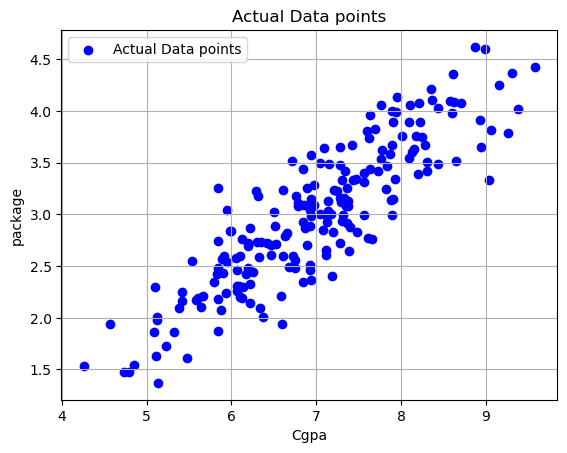

In [17]:
# plot actual data

plt.scatter(df['cgpa'], df['package'], color = 'blue', label = 'Actual Data points')

plt.title("Actual Data points")
plt.xlabel("Cgpa")
plt.ylabel("package")
plt.legend()
plt.grid()
plt.show()

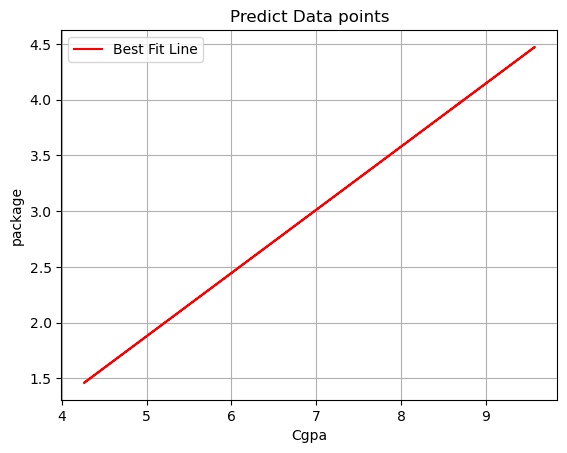

In [18]:
# predict plot

plt.plot(X_train, model.predict(X_train), color='red', label='Best Fit Line')

plt.title("Predict Data points")
plt.xlabel("Cgpa")
plt.ylabel("package")
plt.legend()
plt.grid()
plt.show()


In [19]:
df.head(2)

,cgpa,package
0,6.89,3.26
1,5.12,1.98


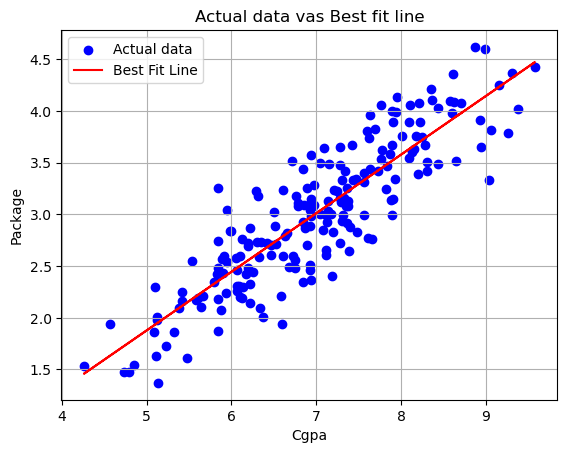

In [ ]:
# Actual data vs Best Fit line

plt.scatter(df['cgpa'], df['package'], color= 'blue', label = 'Actual data')

plt.plot(X_train, model.predict(X_train), color='red', label = 'Best Fit Line')

plt.title("Actual data vas Best fit line")
plt.xlabel("Cgpa")
plt.ylabel("Package")


plt.legend()
plt.grid(True)
plt.show()

### 6. Prediction for a New data

In [24]:
new_cgpa = np.array([[8.5]])

new_package = model.predict(new_cgpa)

print(f"For {new_cgpa} Package: {new_package}")

For [[8.5]] Package: [3.86083841]


c:\Users\KzRaihan\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
